In [1]:
import csv
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 3

# 入力長

In [4]:
TIME_STEPS = 16
DIMENSION = 2

# 学習データ読み込み

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [8]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 24)                792       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                250       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 1,075
Trainable params: 1,075
Non-trainable params: 0
_________________________________________________________________


In [10]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
13/25 [==============>...............] - ETA: 0s - loss: 1.1003 - accuracy: 0.2650 
Epoch 1: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 2s 34ms/step - loss: 1.0940 - accuracy: 0.3038 - val_loss: 1.0803 - val_accuracy: 0.3238
Epoch 2/1000
13/25 [==============>...............] - ETA: 0s - loss: 1.0759 - accuracy: 0.3768
Epoch 2: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 12ms/step - loss: 1.0742 - accuracy: 0.3643 - val_loss: 1.0649 - val_accuracy: 0.3324
Epoch 3/1000
24/25 [===========================>..] - ETA: 0s - loss: 1.0526 - accuracy: 0.3760
Epoch 3: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 14ms/step - loss: 1.0529 - accuracy: 0.3748 - val_loss: 1.0430 - val_accuracy: 0.3687
Epoch 4/1000
21/25 [========================>.....] - ETA: 0s -

20/25 [=======================>......] - ETA: 0s - loss: 0.3095 - accuracy: 0.9039
Epoch 27: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 14ms/step - loss: 0.3043 - accuracy: 0.9061 - val_loss: 0.1829 - val_accuracy: 0.9656
Epoch 28/1000
17/25 [===================>..........] - ETA: 0s - loss: 0.3133 - accuracy: 0.9067
Epoch 28: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 18ms/step - loss: 0.3072 - accuracy: 0.9054 - val_loss: 0.1762 - val_accuracy: 0.9666
Epoch 29/1000
23/25 [==========================>...] - ETA: 0s - loss: 0.2905 - accuracy: 0.9093
Epoch 29: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 19ms/step - loss: 0.2921 - accuracy: 0.9089 - val_loss: 0.1712 - val_accuracy: 0.9685
Epoch 30/1000
15/25 [=================>............] - ETA: 0s - loss: 0

15/25 [=================>............] - ETA: 0s - loss: 0.2291 - accuracy: 0.9255
Epoch 53: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 18ms/step - loss: 0.2194 - accuracy: 0.9290 - val_loss: 0.1060 - val_accuracy: 0.9742
Epoch 54/1000
16/25 [==================>...........] - ETA: 0s - loss: 0.1916 - accuracy: 0.9434
Epoch 54: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 10ms/step - loss: 0.1912 - accuracy: 0.9404 - val_loss: 0.1041 - val_accuracy: 0.9752
Epoch 55/1000
13/25 [==============>...............] - ETA: 0s - loss: 0.1966 - accuracy: 0.9447
Epoch 55: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 11ms/step - loss: 0.2003 - accuracy: 0.9408 - val_loss: 0.1018 - val_accuracy: 0.9752
Epoch 56/1000
14/25 [===============>..............] - ETA: 0s - loss: 0

20/25 [=======================>......] - ETA: 0s - loss: 0.1811 - accuracy: 0.9387
Epoch 79: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 17ms/step - loss: 0.1803 - accuracy: 0.9401 - val_loss: 0.0839 - val_accuracy: 0.9780
Epoch 80/1000
20/25 [=======================>......] - ETA: 0s - loss: 0.1900 - accuracy: 0.9441
Epoch 80: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 13ms/step - loss: 0.1848 - accuracy: 0.9452 - val_loss: 0.0840 - val_accuracy: 0.9780
Epoch 81/1000
18/25 [====================>.........] - ETA: 0s - loss: 0.1653 - accuracy: 0.9484
Epoch 81: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 12ms/step - loss: 0.1752 - accuracy: 0.9446 - val_loss: 0.0828 - val_accuracy: 0.9780
Epoch 82/1000
15/25 [=================>............] - ETA: 0s - loss: 0

25/25 [==============================] - ETA: 0s - loss: 0.1584 - accuracy: 0.9484
Epoch 105: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 14ms/step - loss: 0.1584 - accuracy: 0.9484 - val_loss: 0.0739 - val_accuracy: 0.9809
Epoch 106/1000
20/25 [=======================>......] - ETA: 0s - loss: 0.1654 - accuracy: 0.9414
Epoch 106: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 17ms/step - loss: 0.1656 - accuracy: 0.9417 - val_loss: 0.0742 - val_accuracy: 0.9809
Epoch 107/1000
25/25 [==============================] - ETA: 0s - loss: 0.1627 - accuracy: 0.9449
Epoch 107: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 1s 24ms/step - loss: 0.1627 - accuracy: 0.9449 - val_loss: 0.0735 - val_accuracy: 0.9828
Epoch 108/1000
23/25 [==========================>...] - ETA: 0s - l

Epoch 131/1000
18/25 [====================>.........] - ETA: 0s - loss: 0.1504 - accuracy: 0.9484
Epoch 131: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 16ms/step - loss: 0.1527 - accuracy: 0.9490 - val_loss: 0.0683 - val_accuracy: 0.9828
Epoch 132/1000
14/25 [===============>..............] - ETA: 0s - loss: 0.1543 - accuracy: 0.9515
Epoch 132: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 17ms/step - loss: 0.1493 - accuracy: 0.9529 - val_loss: 0.0675 - val_accuracy: 0.9828
Epoch 133/1000
13/25 [==============>...............] - ETA: 0s - loss: 0.1674 - accuracy: 0.9417
Epoch 133: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 14ms/step - loss: 0.1541 - accuracy: 0.9443 - val_loss: 0.0673 - val_accuracy: 0.9828
Epoch 134/1000
25/25 [==============================

Epoch 157/1000
19/25 [=====================>........] - ETA: 0s - loss: 0.1424 - accuracy: 0.9572
Epoch 157: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 1s 22ms/step - loss: 0.1413 - accuracy: 0.9567 - val_loss: 0.0639 - val_accuracy: 0.9828
Epoch 158/1000
22/25 [=========================>....] - ETA: 0s - loss: 0.1444 - accuracy: 0.9517
Epoch 158: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 12ms/step - loss: 0.1425 - accuracy: 0.9525 - val_loss: 0.0625 - val_accuracy: 0.9828
Epoch 159/1000
17/25 [===================>..........] - ETA: 0s - loss: 0.1512 - accuracy: 0.9522
Epoch 159: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 18ms/step - loss: 0.1481 - accuracy: 0.9500 - val_loss: 0.0626 - val_accuracy: 0.9828
Epoch 160/1000
16/25 [==================>...........

Epoch 183/1000
23/25 [==========================>...] - ETA: 0s - loss: 0.1355 - accuracy: 0.9555
Epoch 183: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 18ms/step - loss: 0.1348 - accuracy: 0.9554 - val_loss: 0.0617 - val_accuracy: 0.9828
Epoch 184/1000
18/25 [====================>.........] - ETA: 0s - loss: 0.1383 - accuracy: 0.9536
Epoch 184: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 15ms/step - loss: 0.1475 - accuracy: 0.9519 - val_loss: 0.0627 - val_accuracy: 0.9828
Epoch 185/1000
13/25 [==============>...............] - ETA: 0s - loss: 0.1205 - accuracy: 0.9597
Epoch 185: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 19ms/step - loss: 0.1323 - accuracy: 0.9567 - val_loss: 0.0604 - val_accuracy: 0.9828
Epoch 186/1000
23/25 [==========================>...

Epoch 209/1000
18/25 [====================>.........] - ETA: 0s - loss: 0.1507 - accuracy: 0.9484
Epoch 209: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 13ms/step - loss: 0.1504 - accuracy: 0.9494 - val_loss: 0.0598 - val_accuracy: 0.9828
Epoch 210/1000
20/25 [=======================>......] - ETA: 0s - loss: 0.1336 - accuracy: 0.9555
Epoch 210: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 14ms/step - loss: 0.1344 - accuracy: 0.9557 - val_loss: 0.0599 - val_accuracy: 0.9838
Epoch 211/1000
22/25 [=========================>....] - ETA: 0s - loss: 0.1359 - accuracy: 0.9592
Epoch 211: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 18ms/step - loss: 0.1394 - accuracy: 0.9573 - val_loss: 0.0602 - val_accuracy: 0.9838
Epoch 212/1000
24/25 [===========================>..

Epoch 235/1000
19/25 [=====================>........] - ETA: 0s - loss: 0.1304 - accuracy: 0.9593
Epoch 235: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 13ms/step - loss: 0.1291 - accuracy: 0.9586 - val_loss: 0.0588 - val_accuracy: 0.9838
Epoch 236/1000
22/25 [=========================>....] - ETA: 0s - loss: 0.1337 - accuracy: 0.9535
Epoch 236: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 12ms/step - loss: 0.1308 - accuracy: 0.9538 - val_loss: 0.0579 - val_accuracy: 0.9847
Epoch 237/1000
22/25 [=========================>....] - ETA: 0s - loss: 0.1315 - accuracy: 0.9560
Epoch 237: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 14ms/step - loss: 0.1361 - accuracy: 0.9548 - val_loss: 0.0578 - val_accuracy: 0.9857
Epoch 238/1000
25/25 [==============================

Epoch 261/1000
13/25 [==============>...............] - ETA: 0s - loss: 0.1262 - accuracy: 0.9549
Epoch 261: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 0s 14ms/step - loss: 0.1304 - accuracy: 0.9551 - val_loss: 0.0565 - val_accuracy: 0.9847
Epoch 262/1000
25/25 [==============================] - ETA: 0s - loss: 0.1363 - accuracy: 0.9615
Epoch 262: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 1s 20ms/step - loss: 0.1363 - accuracy: 0.9615 - val_loss: 0.0564 - val_accuracy: 0.9847
Epoch 263/1000
22/25 [=========================>....] - ETA: 0s - loss: 0.1315 - accuracy: 0.9567
Epoch 263: saving model to model/point_history_classifier\point_history_classifier.hdf5
25/25 [==============================] - 1s 29ms/step - loss: 0.1252 - accuracy: 0.9589 - val_loss: 0.0568 - val_accuracy: 0.9838
Epoch 264/1000
16/25 [==================>...........

In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 203ms/step
[0.9004545  0.0041528  0.09539272]
0


# 混同行列

33/33 [==============================] - 0s 3ms/step


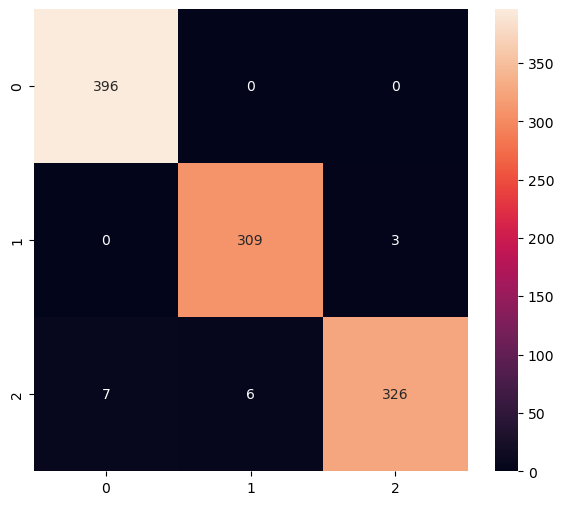

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       396
           1       0.98      0.99      0.99       312
           2       0.99      0.96      0.98       339

    accuracy                           0.98      1047
   macro avg       0.98      0.98      0.98      1047
weighted avg       0.98      0.98      0.98      1047



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [17]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [18]:
# モデルを変換(量子化
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\mfaja\AppData\Local\Temp\tmpkw21_00_\assets


6388

# 推論テスト

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_1:0', 'index': 0, 'shape': array([ 1, 32]), 'shape_signature': array([-1, 32]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.77480465 0.01290015 0.21229509]
0
